In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import sklearn
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dense, GlobalAveragePooling2D

#Inception ResNetV2
from tensorflow.keras.applications import InceptionResNetV2

2024-08-29 17:43:08.065975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 17:43:08.066080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 17:43:08.187383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Function to load images and resize it to 224x224px

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(os.path.join(path, file))))
        labels.append((label))
        
    return images, labels

In [3]:
#Loading Training Data

x_train = []
y_train = []


images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/CaS', 0) 
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/CoS', 1)
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/Gum', 2)
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/MC', 3)
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/OC', 4)
    
x_train += images
y_train += labels


images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/OLP', 5)
    
x_train += images
y_train += labels


images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/OT', 6)
    
x_train += images
y_train += labels

In [4]:
print(np.array(x_train).shape)
print(np.array(y_train).shape)

(3087, 256, 256, 3)
(3087,)


In [5]:
#Loading Validation Data

x_val = []
y_val = []

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/CaS', 0)

x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/CoS', 1)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/Gum', 2)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/MC', 3)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/OC', 4)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/OLP', 5)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/OT', 6)
    
x_val += images
y_val += labels




In [6]:
print(np.array(x_val).shape)
print(np.array(y_val).shape)

(1028, 256, 256, 3)
(1028,)


In [7]:
#Loading Testing Data

x_test = []
y_test = []

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/CaS', 0)

x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/CoS', 1)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/Gum', 2)
    
x_test += images
y_test += labels 

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/MC', 3)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/OC', 4)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/OLP', 5)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/OT', 6)
    
x_test += images
y_test += labels


In [8]:
print(np.array(x_test).shape)
print(np.array(y_test).shape)

(1028, 256, 256, 3)
(1028,)


In [9]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_val are currently in shape (None,)
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [10]:
#Converting to numpy array

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

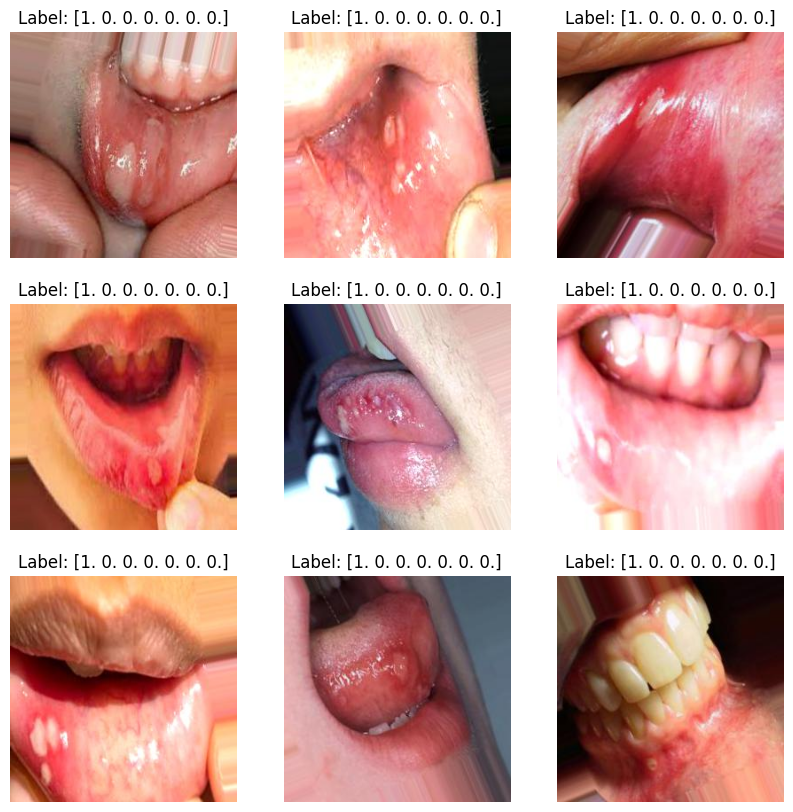

In [11]:
num_images = 9

# Create a figure with 3x3 subplots
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype('uint8'))  # Convert image to uint8 to display correctly
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')  # Hide axes

plt.show()

In [12]:
print("Data type of x_train:", x_train.dtype)
print("Data type of y_train:", y_train.dtype)

print("Data type of x_val:", x_val.dtype)
print("Data type of y_val:", y_val.dtype)

print("Data type of x_test:", x_test.dtype)
print("Data type of y_test:", y_test.dtype)

Data type of x_train: float32
Data type of y_train: float64
Data type of x_val: float32
Data type of y_val: float64
Data type of x_test: float32
Data type of y_test: float64


In [13]:
#Normalization

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [14]:
shuffle_indices = np.random.permutation(len(x_train))
x_train = x_train[shuffle_indices]
y_train = y_train[shuffle_indices]

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [16]:
#Define Early Stopping Callback

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', patience=10,verbose=1 ,restore_best_weights=True
)


lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)



In [17]:
#Pre-Trained Model

base_model = InceptionResNetV2(weights='/kaggle/input/inceptio/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(256, 256, 3))


In [18]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze
for layer in base_model.layers[-15:]:
    layer.trainable = True


In [19]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed_5b False
41 conv2d_15 False
42 batch_normalization_15

In [20]:
# Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add a Dropout layer with a 50% dropout rate
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)  # Reduce units to 512 with L2 regularization
x = tf.keras.layers.Dropout(0.5)(x)  # Another Dropout layer
predictions = Dense(7, activation='softmax')(x)  # Output layer

In [21]:
model = Model(inputs=base_model.input, outputs=predictions)

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 55,127,271 (210.29 MB)

 Trainable params: 5,621,959 (21.45 MB)

 Non-trainable params: 49,505,312 (188.85 MB)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(x_val, y_val), callbacks=[earlystop_callback,lr_reduction]
)

Epoch 1/25
 1/97 ━━━━━━━━━━━━━━━━━━━━ 1:08:42 43s/step - accuracy: 0.1875 - loss: 3.0868

I0000 00:00:1724953485.280980      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 ━━━━━━━━━━━━━━━━━━━━ 102s 612ms/step - accuracy: 0.4389 - loss: 2.3840 - val_accuracy: 0.7014 - val_loss: 2.0689 - learning_rate: 0.0010
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.8554 - loss: 1.0624 - val_accuracy: 0.8288 - val_loss: 1.3312 - learning_rate: 0.0010
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.9336 - loss: 0.7239 - val_accuracy: 0.8395 - val_loss: 1.3275 - learning_rate: 0.0010
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.9536 - loss: 0.5884 - val_accuracy: 0.8599 - val_loss: 0.9987 - learning_rate: 0.0010
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9700 - loss: 0.4838 - val_accuracy: 0.8881 - val_loss: 0.8848 - learning_rate: 0.0010
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - accuracy: 0.9693 - loss: 0.4252 - val_accuracy: 0.9621 - val_loss: 0.4033 - learning_rate: 0.0010
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.9898 - loss: 0.3180 - val

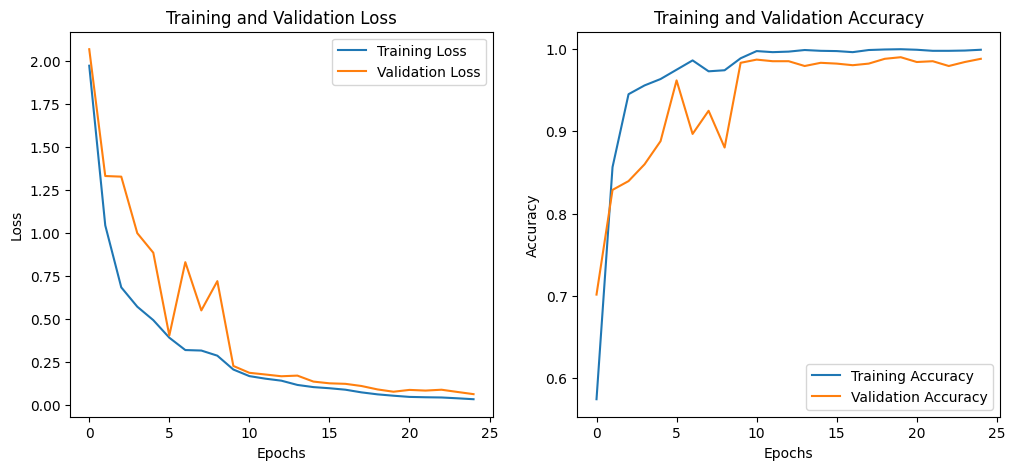

In [25]:
loss_acc_metrics_df = pd.DataFrame(history.history)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_acc_metrics_df['loss'], label='Training Loss')
plt.plot(loss_acc_metrics_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(loss_acc_metrics_df['accuracy'], label='Training Accuracy')
plt.plot(loss_acc_metrics_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [26]:
#Evaluating the model on test data

test_loss,test_acc = model.evaluate(x_test, y_test)

print("Test Loss: ", test_loss*100)
print("Test Accuracy: ", test_acc*100)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9893 - loss: 0.0597
Test Loss:  7.808850705623627
Test Accuracy:  98.44357967376709


In [27]:
model.save('teeth_model.h5')


In [28]:
from IPython.display import FileLink

FileLink('teeth_model.h5')


/kaggle/working/teeth_model.h5

In [29]:
script = """
import streamlit as st
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Load the model
model = load_model('my_model.h5')

# Streamlit App
st.title('Teeth Disease Classification')

# Upload an image
uploaded_file = st.file_uploader("Choose a teeth image...", type="jpg")

if uploaded_file is not None:
    # Open and display the image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Preprocess the image
    image = image.resize((256, 256))
    image = np.array(image)
    image = image / 255.0  # normalize
    image = np.expand_dims(image, axis=0)  # add batch dimension

    # Make a prediction
    predictions = model.predict(image)
    class_names = ['Disease 1', 'Disease 2', 'Disease 3', 'Disease 4', 'Disease 5', 'Disease 6', 'Disease 7']
    st.write("Prediction: ", class_names[np.argmax(predictions)])
"""

with open('app.py', 'w') as f:
    f.write(script)


In [30]:
FileLink('app.py')


/kaggle/working/app.py